In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
import matplotlib.pyplot as plt


In [3]:
# Reading data
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
# Exploring data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# Exploring features
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# Exploring dimensions
df.shape

(51717, 17)

In [7]:
# Exploring information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Statistical summery
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


#### Comments:
* 

### Features definition:

* **url**: contains the url of the restaurant in the zomato website.
* **address:** contains the address of the restaurant in Bengaluru.
* **name:** contains the name of the restaurant.
* **online-order:** whether online ordering is available in the restaurant or not.
* **book-table:** table book option available or not.
* **rate:** contains the overall rating of the restaurant out of 5.
* **votes:** contains total number of rating for the restaurant as of the above mentioned date.
* **phone:** contains the phone number of the restaurant.
* **location:** contains the neighborhood in which the restaurant is located.
* **rest-type:** restaurant type.
* **dish_liked:** dishes people liked in the restaurant
* **cuisines:** food styles, separated by comma
* **approx_cost(for two people):** contains the approximate cost for meal for two people
* **reviews_list:** of tuples containing reviews for the restaurant, each tuple
* **menu_item:** contains list of menus available in the restaurant
* **listed_in(type):** type of meal
* **listed_in(city):** contains the neighborhood in which the restaurant is listed


## Data Preprocessing:

In [9]:
# check for nulls
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# Nulls percentage
print("Percentage NaN values in df:")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage NaN values in df:


url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [11]:
#Check for Duplicates
df.duplicated().sum()

0

- Although there is no dublicated data but there aren't 51k restaurants in Bengaluru. 
- **Then, How 51K (51k different link for each restaurant) restaurants were listed in the zomato website?**

- **The Answer is:** the data set was scraped individually for each category. Ex.: Buffet, dineout, pubs, bars, delivery, nightlife, etc. so it may have happened a restaurant was mentioned in more than one category.

### Univariate Analysis

In [12]:
# Number of repeated restaurants observations in different category features 
dub_res = df.duplicated(subset='name').sum()
# Number of resturants
uni_res = df.name.unique().size
# total number of obsercations
total_obs= df.shape[0]
print("Total number of observations =", total_obs)
print("Total number of unique resturant names =", uni_res)
print("Total number of dublicated resturants names =", dub_res)
# validate observations
print("Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ?",
      dub_res + uni_res == total_obs)

Total number of observations = 51717
Total number of unique resturant names = 8792
Total number of dublicated resturants names = 42925
Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ? True


In [13]:
df.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

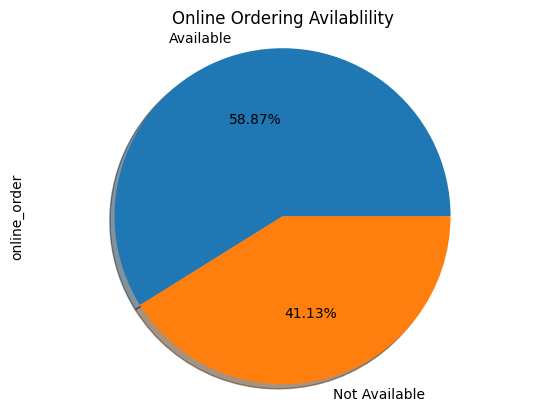

In [14]:
# Exploring features: online_order
df.online_order.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'],  shadow=True, autopct='%1.2f%%')
plt.title('Online Ordering Avilablility')
plt.axis('equal')
plt.show();

In [15]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

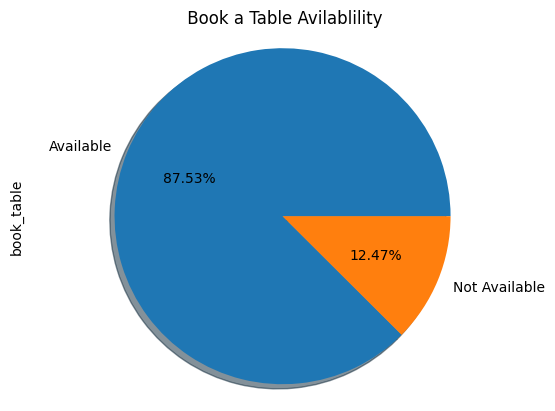

In [16]:
# Exploring features: book_table
df.book_table.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'],  shadow=True, autopct='%1.2f%%')
plt.title(' Book a Table Avilablility')
plt.axis('equal')
plt.show();

In [17]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
pd.set_option("display.max_rows", None)

In [19]:
df.rate.value_counts(dropna=False)

NaN       7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1/5     1474
4.1 /5    1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
3.0 /5     465
2.9/5      427
4.5 /5     409
2.9 /5     375
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
4.9 /5      30
2.4 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, dtype: int64

In [20]:
df['rate'] = df.rate.str.replace(' ', '').replace("NEW",np.NaN).replace("-", np.NaN)

In [21]:
df.rate.value_counts(dropna=False)

NaN      10052
3.9/5     3972
3.8/5     3873
3.7/5     3821
3.6/5     3316
4.0/5     3183
4.1/5     2948
3.5/5     2784
3.4/5     2476
3.3/5     2310
4.2/5     2184
3.2/5     1873
4.3/5     1693
3.1/5     1561
4.4/5     1147
3.0/5     1023
2.9/5      802
4.5/5      656
2.8/5      600
2.7/5      307
4.6/5      300
2.6/5      260
4.7/5      167
2.5/5      101
2.4/5       70
4.8/5       66
4.9/5       55
2.3/5       51
2.2/5       26
2.1/5       24
2.0/5       11
1.8/5        5
Name: rate, dtype: int64

In [22]:
df.rate.isnull().sum()

10052

In [23]:
(df.rate.isna().sum() * 100 / df.index.size).round(2)

19.44